## 7 days (6 Train, 1 Test)

In [1]:
# Re-import pandas and reload the datasets since the code execution state was reset
import pandas as pd

# Reload the datasets from the newly uploaded files
file_path_memory_new = 'models_kpi_memory_dataset_rnd.csv'
file_path_cpu_new = 'models_kpi_cpu_dataset_rnd.csv'

# Load the memory data
data_memory_new = pd.read_csv(file_path_memory_new)

# Load the CPU data
data_cpu_new = pd.read_csv(file_path_cpu_new)

# Display the first few rows of each dataframe to confirm the structure
(data_memory_new.head(), data_cpu_new.head())


(  unique_id     AutoARIMA     AutoTheta       AutoETS           CES  \
 0   100_CPU  9.643793e+08  6.466396e+08  5.587067e+08  6.234323e+08   
 1   101_CPU  4.684443e+08  3.500214e+08  3.543343e+08  3.669218e+08   
 2   102_CPU  7.186885e+09  9.526470e+08  1.014346e+09  2.001428e+09   
 3   103_CPU  8.331056e+08  9.337498e+08  1.749137e+09  1.460295e+09   
 4   104_CPU  4.229733e+09  1.153105e+09  2.834639e+09  1.835767e+09   
 
            MSTL  SeasonalNaive  WindowAverage        SeasWA         Naive  \
 0  5.817956e+08   8.558751e+08   1.117182e+09  8.558751e+08  9.682751e+08   
 1  3.780183e+08   4.184291e+08   3.470329e+08  4.184291e+08  3.464075e+08   
 2  1.925805e+09   1.346994e+09   9.098382e+08  1.346994e+09  1.288981e+09   
 3  1.636978e+09   1.408096e+09   9.011891e+08  1.408096e+09  8.734539e+08   
 4  2.100330e+09   1.673330e+09   1.285916e+09  1.673330e+09  7.361002e+09   
 
         prophet     best_model  
 0  7.053809e+08        AutoETS  
 1  3.466218e+08          Na

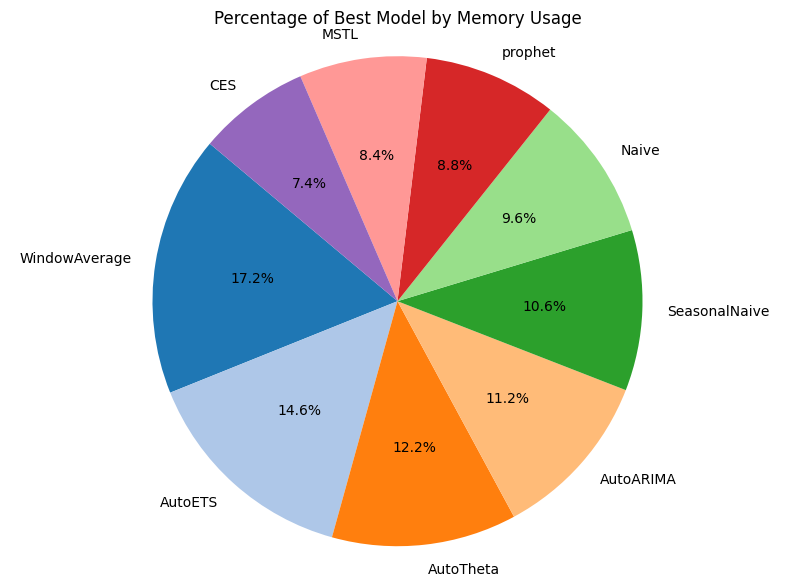

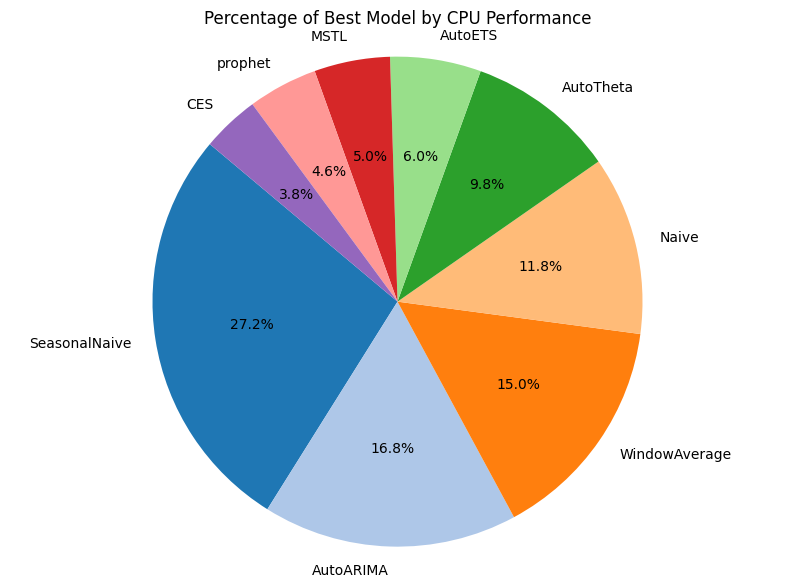

In [2]:
import matplotlib.pyplot as plt

# Calculate the frequency of each best model for memory
best_model_memory_counts_new = data_memory_new['best_model'].value_counts()

# Plot the pie chart for memory
plt.figure(figsize=(10, 7))
plt.pie(best_model_memory_counts_new, labels=best_model_memory_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_memory_counts_new)])
plt.title('Percentage of Best Model by Memory Usage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate the frequency of each best model for CPU
best_model_cpu_counts_new = data_cpu_new['best_model'].value_counts()

# Plot the pie chart for CPU
plt.figure(figsize=(10, 7))
plt.pie(best_model_cpu_counts_new, labels=best_model_cpu_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_cpu_counts_new)])
plt.title('Percentage of Best Model by CPU Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [3]:
# Merge the datasets on 'unique_id'
merged_models = pd.merge(data_cpu_new[['unique_id', 'best_model']], data_memory_new[['unique_id', 'best_model']], on='unique_id', suffixes=('_cpu', '_memory'))

# Create a new column for the pair of best models
merged_models['model_pair'] = merged_models['best_model_cpu'] + ' & ' + merged_models['best_model_memory']

# Calculate the frequency of each pair
model_pair_counts = merged_models['model_pair'].value_counts()

# Display the frequency of each model pair
model_pair_counts


model_pair
SeasonalNaive & SeasonalNaive    28
WindowAverage & WindowAverage    26
AutoARIMA & AutoARIMA            21
SeasonalNaive & WindowAverage    18
SeasonalNaive & MSTL             17
                                 ..
AutoETS & CES                     1
MSTL & AutoARIMA                  1
WindowAverage & MSTL              1
AutoETS & Naive                   1
CES & SeasonalNaive               1
Name: count, Length: 77, dtype: int64

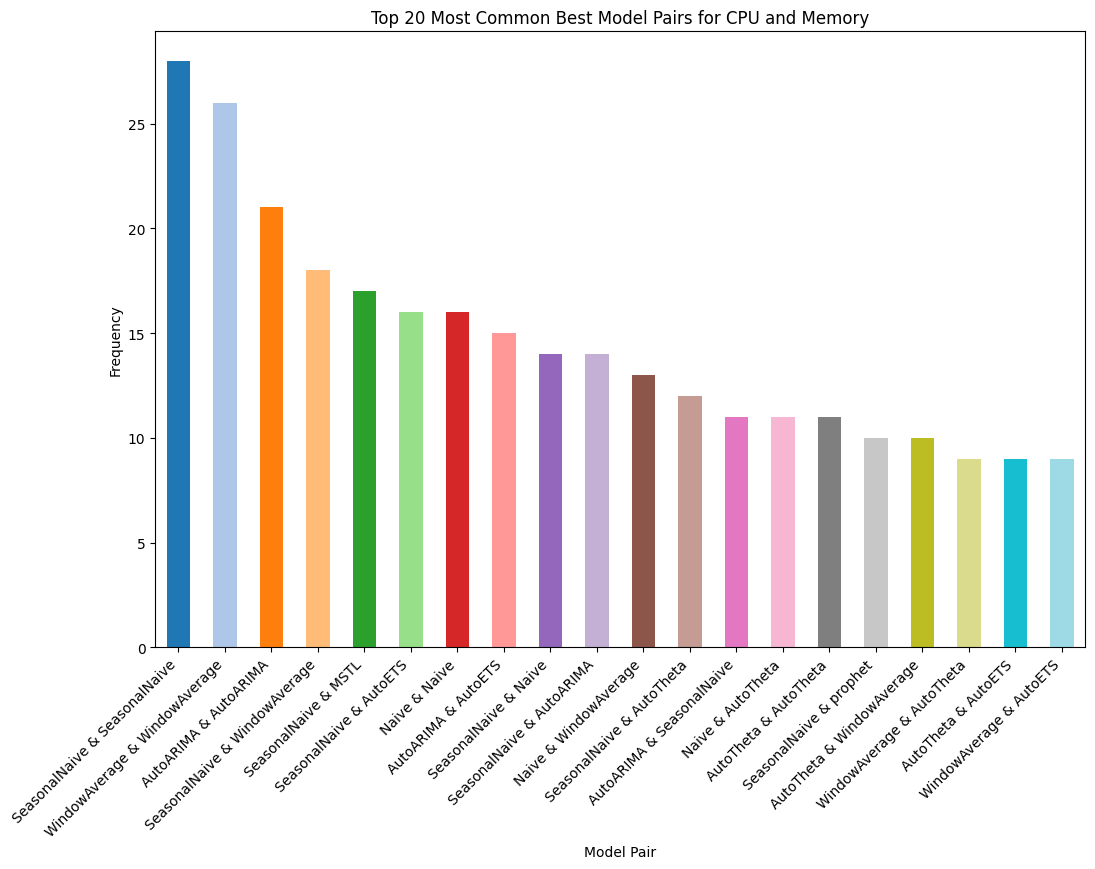

In [4]:
# Plot the top 10 most common model pairs
top_model_pairs = model_pair_counts.head(20)

plt.figure(figsize=(12, 8))
top_model_pairs.plot(kind='bar', color=plt.cm.tab20.colors[:len(top_model_pairs)])
plt.title('Top 20 Most Common Best Model Pairs for CPU and Memory')
plt.xlabel('Model Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


## 30 days (23 Train, 7 Test)

In [5]:
# Re-import pandas and reload the datasets since the code execution state was reset
import pandas as pd

# Reload the datasets from the newly uploaded files
file_path_memory_new = 'models_kpi_memory_dataset_rnd_one_week.csv'
file_path_cpu_new = 'models_kpi_cpu_dataset_rnd_one_week.csv'

# Load the memory data
data_memory_new = pd.read_csv(file_path_memory_new)

# Load the CPU data
data_cpu_new = pd.read_csv(file_path_cpu_new)

# Display the first few rows of each dataframe to confirm the structure
(data_memory_new.head(), data_cpu_new.head())


(  unique_id     AutoARIMA     AutoTheta       AutoETS           CES  \
 0   100_CPU  5.332605e+08  5.475788e+08  4.236499e+08  4.293087e+08   
 1   101_CPU  4.369679e+08  3.810765e+08  3.664745e+08  5.776447e+08   
 2   102_CPU  2.863146e+09  2.795886e+09  2.875424e+09  3.199788e+09   
 3   103_CPU  3.918970e+09  3.873336e+09  4.048839e+09  4.792263e+09   
 4   104_CPU  2.518599e+09  2.506621e+09  2.573001e+09  2.609748e+09   
 
            MSTL  SeasonalNaive  WindowAverage        SeasWA         Naive  \
 0  4.554131e+08   7.116916e+08   5.523055e+08  7.116916e+08  1.236343e+09   
 1  4.346710e+08   6.638815e+08   3.109316e+08  6.638815e+08  5.539233e+08   
 2  2.550629e+09   3.016689e+09   2.306040e+09  3.016689e+09  5.748519e+09   
 3  3.945490e+09   3.873826e+09   2.810679e+09  3.873826e+09  5.972810e+09   
 4  2.504436e+09   3.036624e+09   2.444027e+09  3.036624e+09  2.460100e+09   
 
         prophet     best_model  
 0  4.937125e+08        AutoETS  
 1  3.457540e+08  WindowAver

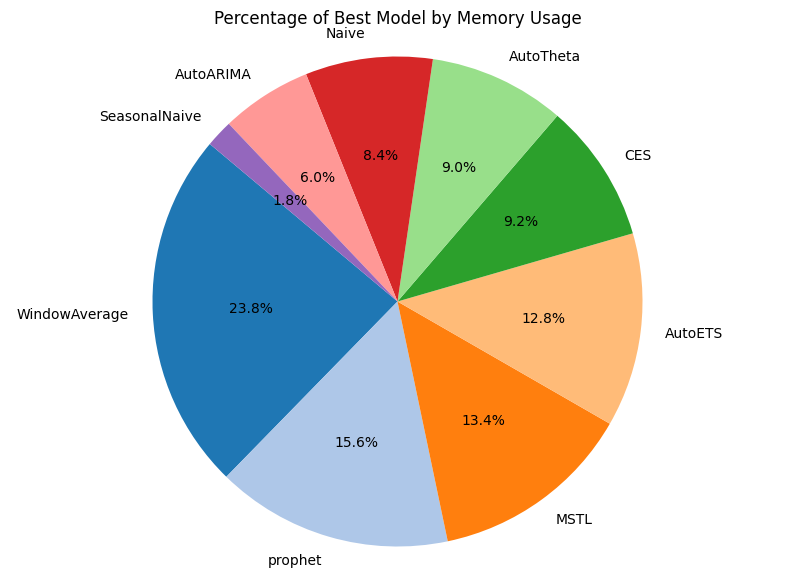

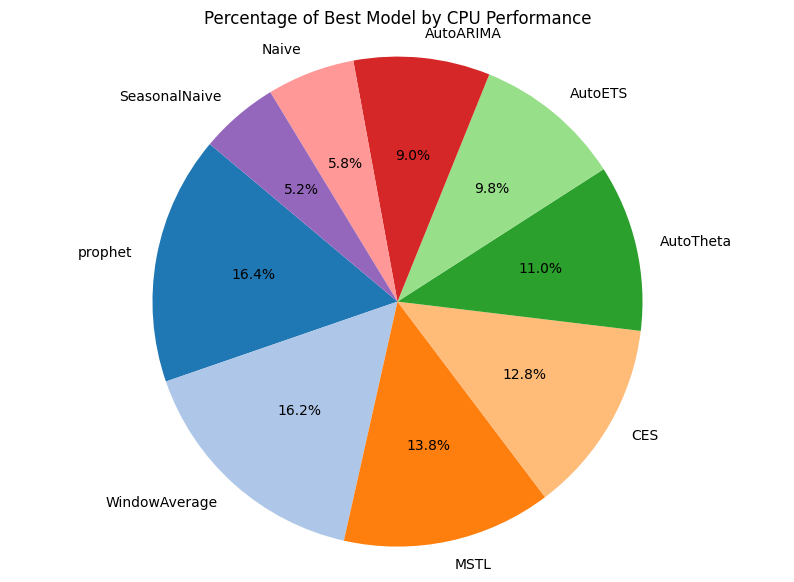

In [6]:
import matplotlib.pyplot as plt

# Calculate the frequency of each best model for memory
best_model_memory_counts_new = data_memory_new['best_model'].value_counts()

# Plot the pie chart for memory
plt.figure(figsize=(10, 7))
plt.pie(best_model_memory_counts_new, labels=best_model_memory_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_memory_counts_new)])
plt.title('Percentage of Best Model by Memory Usage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate the frequency of each best model for CPU
best_model_cpu_counts_new = data_cpu_new['best_model'].value_counts()

# Plot the pie chart for CPU
plt.figure(figsize=(10, 7))
plt.pie(best_model_cpu_counts_new, labels=best_model_cpu_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_cpu_counts_new)])
plt.title('Percentage of Best Model by CPU Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [7]:
# Merge the datasets on 'unique_id'
merged_models = pd.merge(data_cpu_new[['unique_id', 'best_model']], data_memory_new[['unique_id', 'best_model']], on='unique_id', suffixes=('_cpu', '_memory'))

# Create a new column for the pair of best models
merged_models['model_pair'] = merged_models['best_model_cpu'] + ' & ' + merged_models['best_model_memory']

# Calculate the frequency of each pair
model_pair_counts = merged_models['model_pair'].value_counts()

# Display the frequency of each model pair
model_pair_counts


model_pair
prophet & prophet                50
WindowAverage & WindowAverage    38
MSTL & MSTL                      19
CES & CES                        18
MSTL & AutoETS                   16
                                 ..
AutoARIMA & SeasonalNaive         1
SeasonalNaive & Naive             1
CES & SeasonalNaive               1
AutoARIMA & CES                   1
Naive & AutoETS                   1
Name: count, Length: 74, dtype: int64

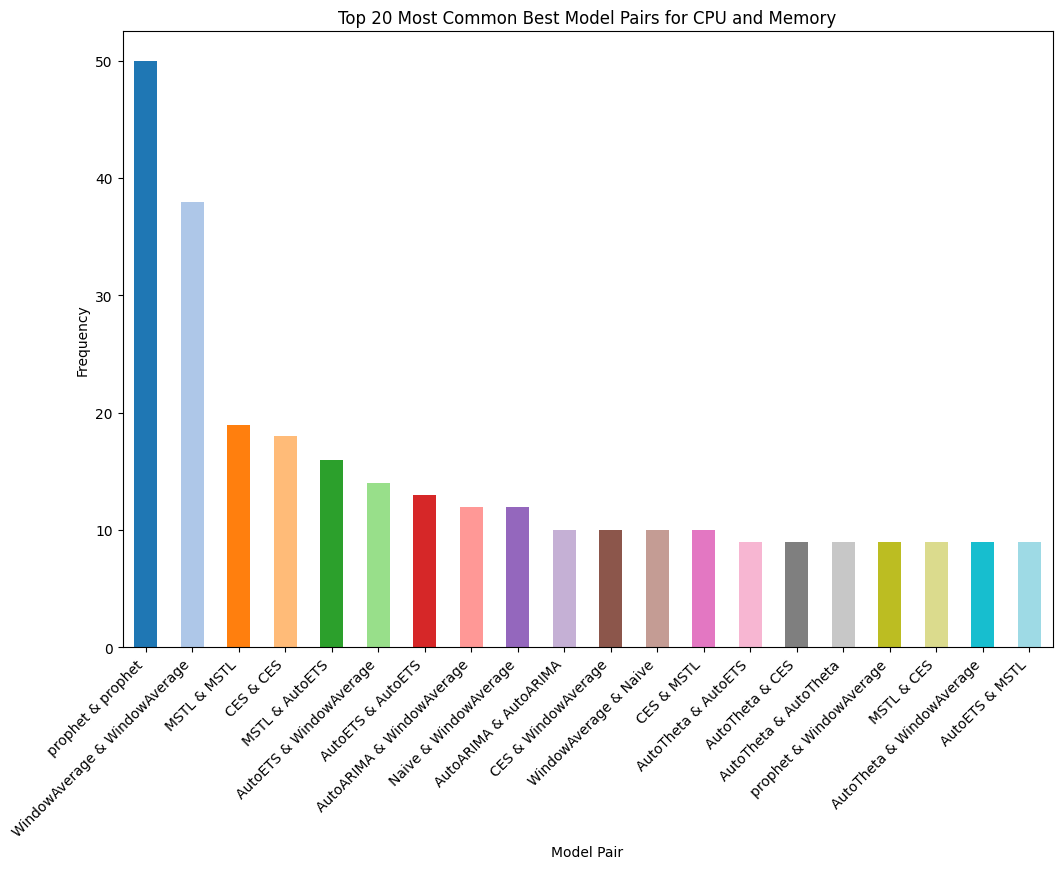

In [8]:
# Plot the top 10 most common model pairs
top_model_pairs = model_pair_counts.head(20)

plt.figure(figsize=(12, 8))
top_model_pairs.plot(kind='bar', color=plt.cm.tab20.colors[:len(top_model_pairs)])
plt.title('Top 20 Most Common Best Model Pairs for CPU and Memory')
plt.xlabel('Model Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


## 90 days (60 Train, 30 Test)

In [9]:
# Re-import pandas and reload the datasets since the code execution state was reset
import pandas as pd

# Reload the datasets from the newly uploaded files
file_path_memory_new = 'models_kpi_memory_dataset_rnd_one_month.csv'
file_path_cpu_new = 'models_kpi_cpu_dataset_rnd_one_month.csv'

# Load the memory data
data_memory_new = pd.read_csv(file_path_memory_new)

# Load the CPU data
data_cpu_new = pd.read_csv(file_path_cpu_new)

# Display the first few rows of each dataframe to confirm the structure
(data_memory_new.head(), data_cpu_new.head())


(  unique_id    Unnamed: 0     AutoARIMA     AutoTheta       AutoETS  \
 0   100_CPU  1.944883e+10  1.215004e+09  1.268786e+09  1.210204e+09   
 1   101_CPU  1.306140e+10  4.816748e+09  9.835431e+08  1.017216e+09   
 2   102_CPU  3.339752e+10  2.700182e+09  2.703812e+09  2.750918e+09   
 3   103_CPU  2.935947e+10  2.341467e+10  2.731668e+09  2.413125e+09   
 4   104_CPU  2.266076e+10  2.103933e+09  2.559916e+09  1.993466e+09   
 
             CES          MSTL  SeasonalNaive  WindowAverage        SeasWA  \
 0  1.049412e+10  1.192252e+09   1.373000e+09   1.223381e+09  1.373000e+09   
 1  7.792942e+09  1.050590e+09   1.188324e+09   8.244316e+08  1.188324e+09   
 2  3.207551e+10  2.581424e+09   6.230639e+09   2.862200e+09  6.230639e+09   
 3  6.682904e+09  2.794959e+09   6.253254e+09   2.898454e+09  6.253254e+09   
 4  2.276843e+10  2.182420e+09   6.144090e+09   2.917765e+09  6.144090e+09   
 
           Naive       prophet     best_model  
 0  1.210949e+09  6.707397e+09           MSTL  


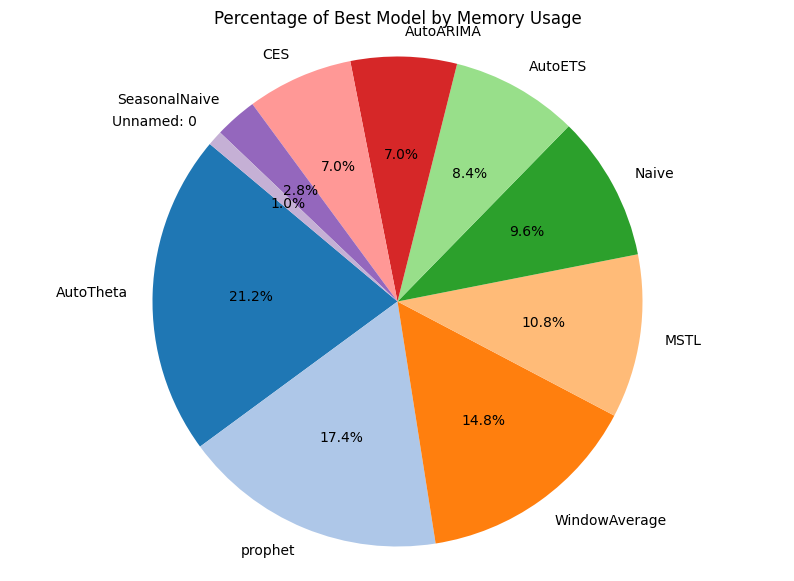

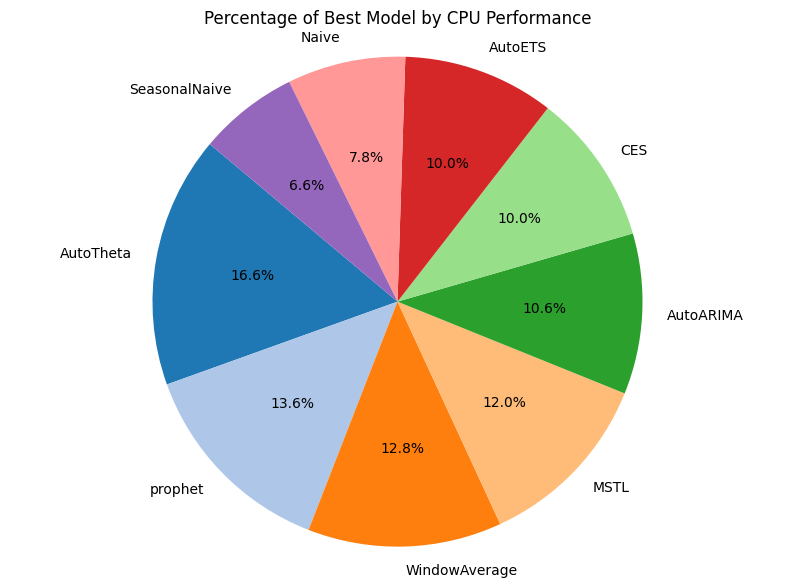

In [10]:
import matplotlib.pyplot as plt

# Calculate the frequency of each best model for memory
best_model_memory_counts_new = data_memory_new['best_model'].value_counts()

# Plot the pie chart for memory
plt.figure(figsize=(10, 7))
plt.pie(best_model_memory_counts_new, labels=best_model_memory_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_memory_counts_new)])
plt.title('Percentage of Best Model by Memory Usage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate the frequency of each best model for CPU
best_model_cpu_counts_new = data_cpu_new['best_model'].value_counts()

# Plot the pie chart for CPU
plt.figure(figsize=(10, 7))
plt.pie(best_model_cpu_counts_new, labels=best_model_cpu_counts_new.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors[:len(best_model_cpu_counts_new)])
plt.title('Percentage of Best Model by CPU Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [11]:
# Merge the datasets on 'unique_id'
merged_models = pd.merge(data_cpu_new[['unique_id', 'best_model']], data_memory_new[['unique_id', 'best_model']], on='unique_id', suffixes=('_cpu', '_memory'))

# Create a new column for the pair of best models
merged_models['model_pair'] = merged_models['best_model_cpu'] + ' & ' + merged_models['best_model_memory']

# Calculate the frequency of each pair
model_pair_counts = merged_models['model_pair'].value_counts()

# Display the frequency of each model pair
model_pair_counts


model_pair
prophet & prophet            43
AutoTheta & AutoTheta        31
WindowAverage & AutoTheta    15
AutoTheta & prophet          14
AutoETS & AutoTheta          13
                             ..
SeasonalNaive & AutoARIMA     1
CES & Unnamed: 0              1
AutoARIMA & Unnamed: 0        1
AutoETS & Unnamed: 0          1
AutoTheta & Unnamed: 0        1
Name: count, Length: 81, dtype: int64

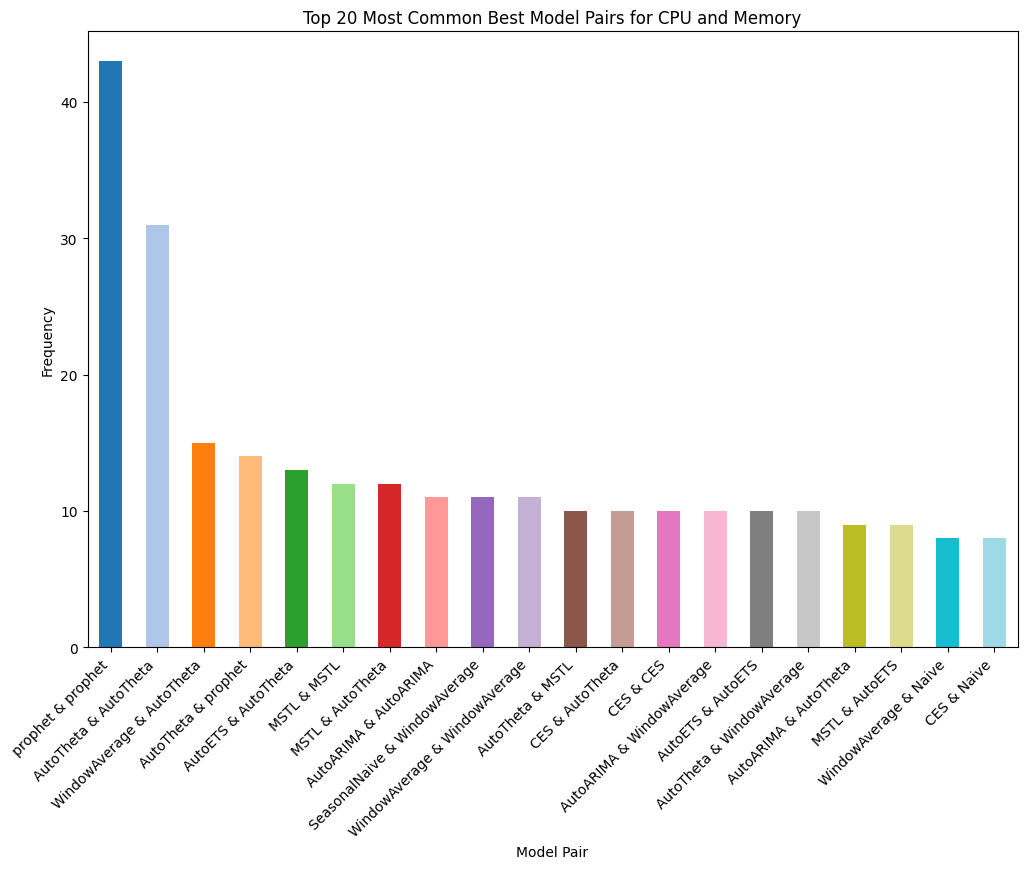

In [12]:
# Plot the top 10 most common model pairs
top_model_pairs = model_pair_counts.head(20)

plt.figure(figsize=(12, 8))
top_model_pairs.plot(kind='bar', color=plt.cm.tab20.colors[:len(top_model_pairs)])
plt.title('Top 20 Most Common Best Model Pairs for CPU and Memory')
plt.xlabel('Model Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()
